# Sarah Spence - HW2

In [62]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt

from data_processing import mahalanobis as mahal
from data_processing import discrete_cosine_transform as dct
from data_processing import dct_28_by_28_masks as dct_masks
import common_helpers as common

In [63]:
iris_df = pd.read_csv("data_files/iris.csv")

## Problem 1

In this problem use the seaborn Python package to create a scatter plot matrix of the Iris dataset.
https://seaborn.pydata.org/examples/scatterplot_matrix.html


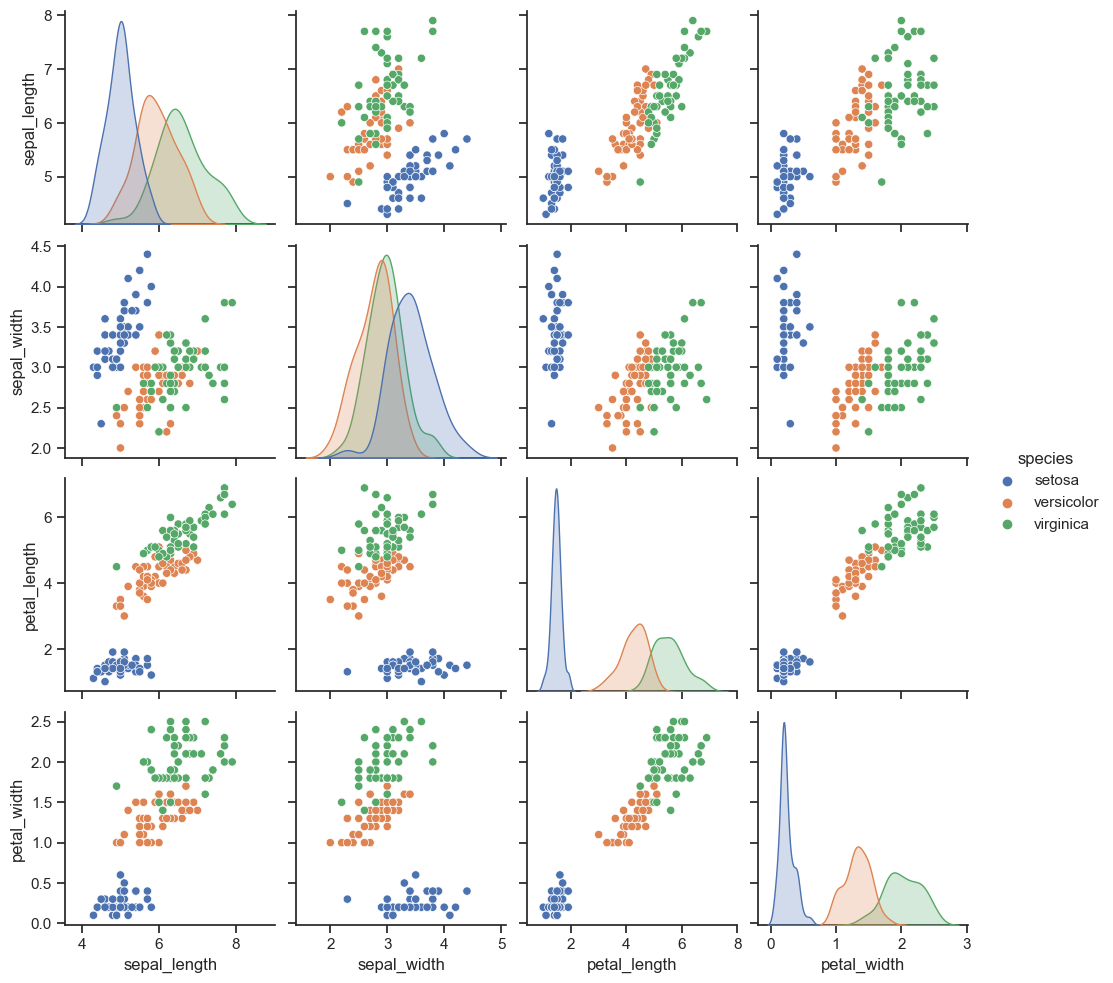

In [64]:
sns.set_theme(style="ticks")
sns.pairplot(iris_df, hue="species")

### (a) (5 Points) Describe the diagonal curves.

The diagonal curves of the scatterplot matrix show that the features are close to normally distributed. The diagonal curves also show that petal length and petal width provide the best separation of classes. The Setosa class stands out with these two features because it has low variance in its examples and high variance between the other classes. 

### (b) (5 Points) Does any feature separate the three classes? If so, which feature. If not, which is the closest.

No feature completely separates the three classes. However, petal width comes the closest to separating the classes, shown by the curves in the bottom right corner of the plot. Petal length also provides good class separation, shown by the third curve along the diagonal. 

### (c) (5 Points) Is there any combination of features that can separate the three classes? If so, which features. If not, which are the closest.

There are no combinations of features that fully separate the three classes. However, the feature combination that comes closest to separating the three classes is (petal length and petal width) because it shows a clear separation between measurements on both the x and y axes.  

## Problem 2 

In this problem, implement code to use the Mahalanobis Distance on the Iris data set. 

#### See the algorithm in data_processing/mahalanobis.py

Using all four features, calculate the 50 distances for the Setosa class.

In [65]:
"""
Calculate the Mahalanobis distances for the 50 observations and four features 
in the setosa class
"""
setosa_df = iris_df[iris_df['species'] == 'setosa']
# Remove the species labels and convert to numpy array
setosa_obs = np.array(setosa_df.iloc[:, :-1])
features = list(setosa_df.columns[:-1])

# Calculate the Mahalanobis distance for all 50 observsation across all features
mahalanobis = mahal.mahalanobis(setosa_obs)
print(f"The 50 Mahalanobis Distances are:\n\n{mahalanobis}")

The 50 Mahalanobis Distances are:

[ 0.44486821  1.94045612  1.31308876  1.66940565  0.8560437   3.68336066
  3.42966594  0.29236644  2.98006525  2.77149364  1.82831792  2.02662299
  2.59435258  7.2024142  10.2428589   7.45898183  5.51988766  0.64281278
  5.12271197  1.65111684  4.96662481  2.60379945 11.20014883  7.43987935
  9.59679686  3.45022215  2.55222024  0.74291031  1.23315308  2.10422906
  1.81383008  5.06880189  8.22604864  5.49773628  2.77149364  3.27559186
  5.62011498  2.77149364  3.31625446  0.4927631   1.66897162 12.62877585
  4.33318869 11.99769958  8.59840876  2.25122608  2.89871971  1.53467749
  1.23940178  0.43392569]


### (a) (5 Points) Calculate the standard deviation (σ1) of the 50 distance values.

In [66]:
mahal_std = np.std(mahalanobis)
print(f"The standard deviation of the 50 distances is: {round(mahal_std, 2)}")

The standard deviation of the 50 distances is: 3.2


### (b) (5 Points) If you remove the observation with the largest distance do the remaining distances appear to be closer together? After removing the observation with the largest distance recalculate the standard deviation (σ2). Do the standard deviation values support your answer.

In [67]:
# Remove the observation with the largest distance in the data
setosa_one_obs_removed = mahal.outlier_removal(setosa_df, features, "species")

# Recalculate the distances
mahal_obs_removed = mahal.mahalanobis(np.array(setosa_one_obs_removed.iloc[:, :-1]))
print(f"The distances after removing the largest observation are:\n\n{mahal_obs_removed}\n")

The distances after removing the largest observation are:

[ 0.41757027  2.61539492  1.42697304  1.70557314  0.8788633   3.6878303
  3.34463238  0.26869759  3.30121681  2.78451366  1.81668642  2.01943565
  2.79130893  7.21183772 10.03609805  7.9869568   5.40045295  0.69454538
  5.01261624  1.76534695  4.87321898  2.53282118 10.97542662  8.02840968
  9.68717031  3.88855892  2.67723658  0.70835737  1.2900354   2.04796717
  1.88751631  5.73278003 10.06936078  6.38531711  2.78451366  3.76649412
  5.71688803  2.78451366  3.52396614  0.47940115  1.71359455  4.24703864
 12.3002186   8.74431825  3.23879023  3.41267741  1.52750889  1.28267871
  0.52667102]



The distances only appear to be slightly closer together after removing the observation with the largest distance. There was more than one outlier in the observations. Another value took on a Mahalanobis distance of 12.3002186.

In [68]:
print(f"The standard deviation after removing the observation with the greatest distance is: {round(np.std(mahal_obs_removed), 2)}.")

The standard deviation after removing the observation with the greatest distance is: 3.06.


The standard deviation also indicates that the distances only because slightly closer together after removing the observation with the greatest Mahalanobis distance. This calculation supports my assumption that there was more than one outlier for the Setosa class. 

### (c) (5 Points) What happens if you remove more than 1 observation?

In [69]:
# Remove the second largest observation in the distances
setosa_two_obs_removed = mahal.outlier_removal(setosa_one_obs_removed, features, "species")
mahal_two_obs_removed = mahal.mahalanobis(np.array(setosa_two_obs_removed.iloc[:, :-1]))
print(f"The new distances after removing two observations from the dataset are:\n\n{mahal_two_obs_removed}\n")

The new distances after removing two observations from the dataset are:

[ 0.40327047  2.54887629  1.39172157  1.67072783  0.85358289  4.20627685
  3.70015864  0.2490519   3.29519688  3.00580882  1.84757181  1.95818177
  2.92982205  7.09781841 10.01915322  8.13693354  6.01073893  0.87982366
  4.9030238   1.84166105  4.81520866  3.42375684 10.73671058 10.54528325
  9.47283493  3.78783284  3.76994971  0.70366613  1.25899816  1.98918135
  1.83137955  6.52286548 10.70676747  6.43799852  3.00580882  3.66944518
  5.63386779  3.00580882  3.50830216  0.46177261  1.93057778  4.18804342
  9.3095651   3.658147    3.38076885  1.49391142  1.3055626   0.49658458]



The observations appear slightly closer together after removing the second largest observation.

In [70]:
print(f"The standard deviation after removing two observations is: {round(np.std(mahal_two_obs_removed), 2)}\n")

The standard deviation after removing two observations is: 2.97



The standard deviation supports my assumption that the distances became slightly closer together after removing the observation with the second largest Mahalanobis distance in the Setosa dataset. 

## Problem 3

In this problem the goal is to build a set of numerical images from a set of arrays. The data set from the Kaggle web site will be used: https://www.kaggle.com/c/digit-recognizer/data
This data has a training.csv, test.csv and sample submission.csv files. In this exercise the focus will be on the train.csv data. The web site has the following data description:

- The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.
- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
- Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.
- The training data set, (train.csv), has 785 columns. The first column, called ”label”, is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.
- Each pixel column in the training set has a name like pixel x, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i ∗28 + j, where i and j are integers between 0 and 27, inclusive. Then pixel x is located on row i and column j of a 28 x 28 matrix, (indexing by zero). For example, pixel 31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

This data is set up in a csv file which will require the reshaping of the data to be 28 ×28 matrix representing images. 

There are 42000 images in the train.csv file. For this problem it is only necessary to process approximately 100 images, 10 each of the numbers from 0 through 9. 

The goal is to learn how to generate features from images using transforms and first order statistics.

### (a) (5 points) Read-in and store the data in a data structure of your choice so that the data is reshaped into a matrix of size 28 ×28 which represents each digit as an image.

In [71]:
# Read the training dataset and get a sample containing 10 observations of each class type       
train_df = pd.read_csv("data_files/train.csv")

# Get 10 examples from each class
split_by_class = common.split_by_class(train_df, [i for i in range(10)], "label", 10)
class_data = split_by_class.values()
sample_train_df = common.reformat_df_by_class(class_data)
# split labels and convert to numpy arrays
labels_sample_df, images_sample_df = common.split_labels(sample_train_df, "label")
sample_labels = np.array(labels_sample_df)
sample_images = np.array(images_sample_df)

# Reshape the images using the above function
reshaped_sample_images = np.array([common.reshape_image(np.array(row), (28, 28)) for row in sample_images])

### (b) (5 points) Display the images for indices 0, 1, 3, 6, 7, 8, 10, 11, 16, and 21. These indices represent the numerical values from 0 to 9.

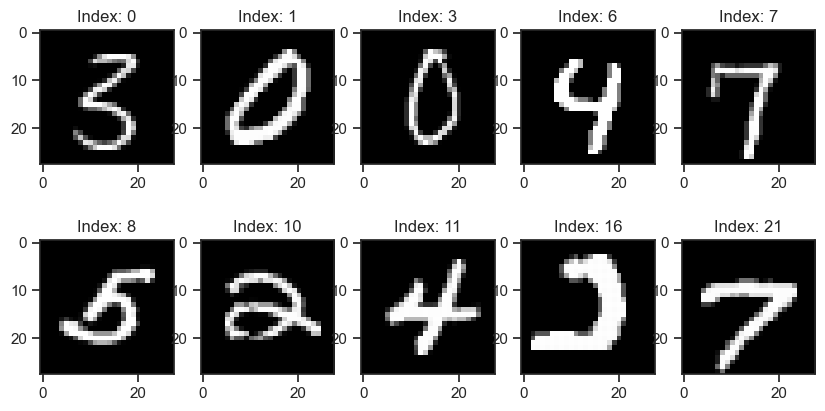

In [72]:
# Get the indices of all labels for plotting in the final step
label_indices = common.get_class_indices(sample_labels, [i for i in range(10)])

common.plot_sample_images(reshaped_sample_images, [0, 1, 3, 6, 7, 8, 10, 11, 16, 21])

## Problem 4

In this problem each image from the train.csv is to be processed to generate a set of features using the discrete cosine transform and Eigen decomposition.

### (a) (15 points) Take the 2 dimensional Discrete Cosine Transform (DCT) of each matrix from Problem 3, the matrix represents each number.

All observations are of size: (28, 28)

The 10 samples images from above with dct applied:



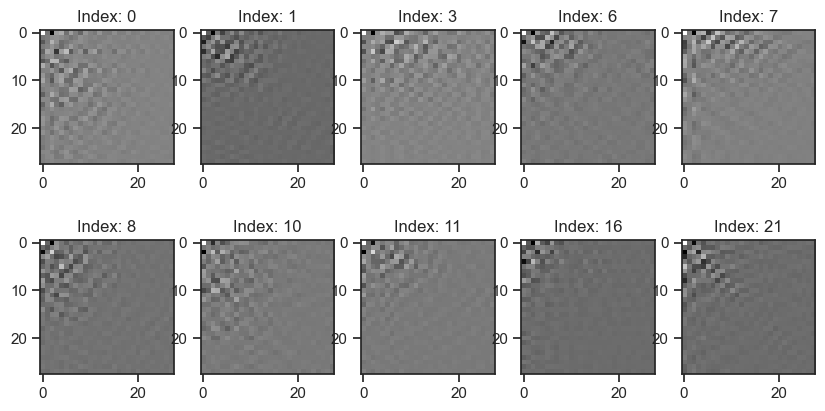

In [73]:
dct_transforms = dct.get_2d_dct_both_axes(reshaped_sample_images)

# Print the shape of the new matrices
print(f"All observations are of size: {dct_transforms[0].shape}\n")

print("The 10 samples images from above with dct applied:\n")
common.plot_sample_images(dct_transforms, [0, 1, 3, 6, 7, 8, 10, 11, 16, 21])

### (b) (10 points) Extract the vertical, horizontal and diagonal coefficients from the transform.

Visualize the masks being applied:
 


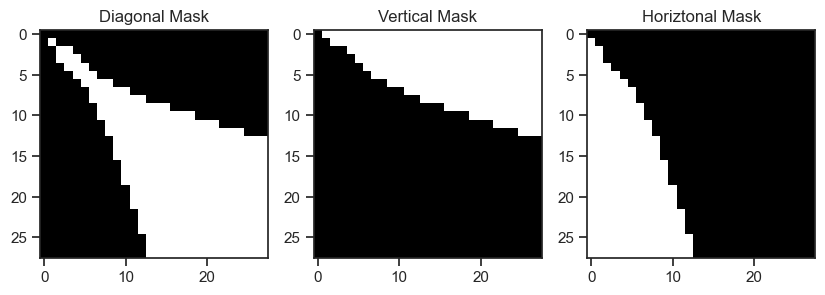

In [74]:
# Display the diagonal, verticle, and horizontal masks for visualization
vertical_mask, diagonal_mask, horizontal_mask = dct_masks.get_masks()
dct_masks.show_masks(vertical_mask, diagonal_mask, horizontal_mask)

In [75]:
# Element-wise multiplication with the masks to obtain the directional coefficients of the dcts
vertical_coeffs, diagonal_coeffs, horizontal_coeffs = dct.get_directional_coefficients(dct_transforms, vertical_mask, diagonal_mask, horizontal_mask)

Vertical Coefficients
---------------------------------------------------------------------------
 


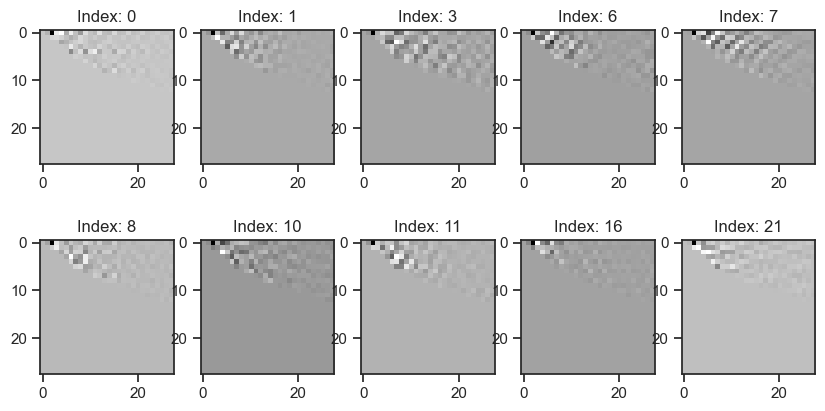

In [76]:
# Re-plot the sample images with each of the masks applied
print(f"Vertical Coefficients\n{'-'*75}\n ")
common.plot_sample_images(vertical_coeffs, [0, 1, 3, 6, 7, 8, 10, 11, 16, 21])


Horizontal Coefficients
---------------------------------------------------------------------------
 


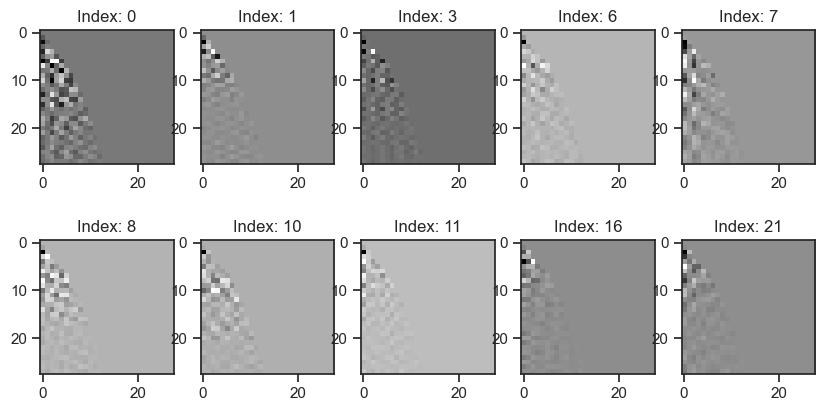

In [77]:
print(f"\nHorizontal Coefficients\n{'-'*75}\n ")
common.plot_sample_images(horizontal_coeffs, [0, 1, 3, 6, 7, 8, 10, 11, 16, 21])


Diagonal Coefficients
---------------------------------------------------------------------------
 


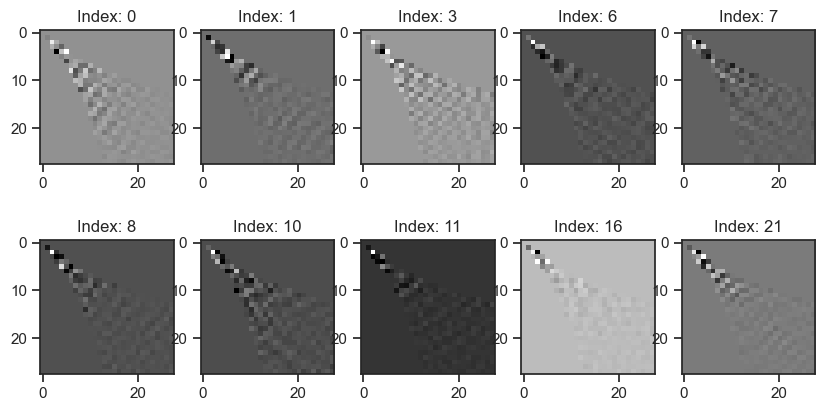

In [78]:
print(f"\nDiagonal Coefficients\n{'-'*75}\n ")
common.plot_sample_images(diagonal_coeffs, [0, 1, 3, 6, 7, 8, 10, 11, 16, 21])

### (c) (15 points) For each of the three sets of DCT coefficients perform Eigen decomposition.

In [79]:
# Flatten the coefficients and get the non zero indices
flattened_vert_coeffs = dct.flatten_and_get_non_zeros(vertical_coeffs)
flattened_horiz_coeffs = dct.flatten_and_get_non_zeros(horizontal_coeffs)
flattened_diag_coeffs = dct.flatten_and_get_non_zeros(diagonal_coeffs)

# Confirm that the shapes match the matlab example 
print(f"The shape of the vertical coefficients should be 224 X 100 and is: {flattened_vert_coeffs.shape}")
print(f"The shape of the horizontal coefficients should be 224 X 100 and is: {flattened_horiz_coeffs.shape}")
print(f"The shape of the diagonal coefficients should be 335 X 100 and is: {flattened_diag_coeffs.shape}")

The shape of the vertical coefficients should be 224 X 100 and is: (224, 100)
The shape of the horizontal coefficients should be 224 X 100 and is: (224, 100)
The shape of the diagonal coefficients should be 335 X 100 and is: (335, 100)


In [80]:
# Get the directional covariance matrices
cov_v, cov_h, cov_d = dct.get_directional_cov_matrices(flattened_vert_coeffs, flattened_horiz_coeffs, flattened_diag_coeffs)
print(f"The vertical covariance matrix is of size: {cov_v.shape}")
print(f"The horizontal covariance matrix is of size: {cov_h.shape}")
print(f"The diagonal covariance matrix is of size: {cov_d.shape}")

The vertical covariance matrix is of size: (224, 224)
The horizontal covariance matrix is of size: (224, 224)
The diagonal covariance matrix is of size: (335, 335)


These calculations match the Matlab exmaple.

In [81]:
import scipy.linalg as la

# Perform Eigen decomposition
[eig_vals_v, eig_vecs_v] = la.eigh(cov_v)
[eig_vals_h, eig_vecs_h] = la.eigh(cov_h)
[eig_vals_d, eig_vecs_d] = la.eigh(cov_d)

# Sort the eigen values in descending order
sorted_eig_vals_v = sorted(eig_vals_v, reverse=True)
sorted_eig_vals_h = sorted(eig_vals_h, reverse=True)
sorted_eig_vals_d = sorted(eig_vals_d, reverse=True)

# Calculate the explained variance ratios for all directions
explained_variance_ratios_v = dct.explained_variance_ratios(sorted_eig_vals_v)
explained_variance_ratios_h = dct.explained_variance_ratios(sorted_eig_vals_h)
explained_variance_ratios_d = dct.explained_variance_ratios(sorted_eig_vals_d)

# Display results
print(f"The first 20 vertical components account for {round(sum(explained_variance_ratios_v[:20])*100, 2)}% of the variance")
print(f"The first 20 horizontal components account for {round(sum(explained_variance_ratios_h[:20])*100, 2)}% of the variance")
print(f"The first 20 diagonal components account for {round(sum(explained_variance_ratios_d[:20])*100, 2)}% of the variance")

The first 20 vertical components account for 86.34% of the variance
The first 20 horizontal components account for 86.08% of the variance
The first 20 diagonal components account for 83.51% of the variance


The top 20 components accounts for over 80% of the variation in each direction. Therefore, retain the top 20 Eigen vectors.

### (d) (10 Points) Retain the top n number of Eigen vectors.

In [82]:
print(f"Summing the initial Eigen values in reverse shows that the Eigen vectors must be flipped {sum(eig_vals_v[:-10])}")

Summing the initial Eigen values in reverse shows that the Eigen vectors must be flipped 405139.2175768922


In [83]:
# Flip the vectors
flipped_vecs_v = np.fliplr(eig_vecs_v)
flipped_vecs_h = np.fliplr(eig_vecs_h)
flipped_vecs_d = np.fliplr(eig_vecs_d)

# Retain the top 20 features
top_n_eigen_vecs_v = flipped_vecs_v[:, 0:20]
top_n_eigen_vecs_h = flipped_vecs_h[:, 0:20]
top_n_eigen_vecs_d = flipped_vecs_d[:, 0:20]

### (e) (10 points) Using your top Eigen vectors reduce the DCT transformed data. This will create a new data set that represents each image as a smaller subset of values.

The shape of the reduced data is: (100, 60)


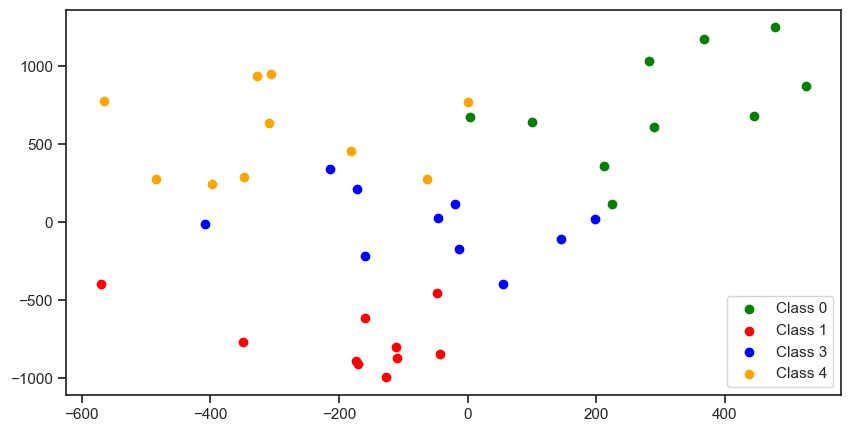

In [84]:
# Transform the original data
transformed_data_v = np.matmul(flattened_vert_coeffs.T, top_n_eigen_vecs_v)
transformed_data_h = np.matmul(flattened_horiz_coeffs.T, top_n_eigen_vecs_h)
transformed_data_d = np.matmul(flattened_diag_coeffs.T, top_n_eigen_vecs_d)

# Append all directional matrices column-wise
final_data = np.hstack((transformed_data_d, transformed_data_v))
final_data = np.hstack((final_data, transformed_data_h))

print(f"The shape of the reduced data is: {final_data.shape}")

# Plot feature 3 (the first diagonal feature) and feature 21 (the first vertical feature) using classes 0, 1, 3, and 4
for i in range(10):
    plt.scatter(final_data[label_indices[0][i]][2], final_data[label_indices[0][i]][20], color='green', label = "class 0")
    plt.scatter(final_data[label_indices[1][i]][2], final_data[label_indices[1][i]][20], color='red', label="class 1")
    plt.scatter(final_data[label_indices[3][i]][2], final_data[label_indices[3][i]][20], color='blue', label="class 3")
    plt.scatter(final_data[label_indices[4][i]][2], final_data[label_indices[4][i]][20], color='orange', label="class 4")
plt.legend(["Class 0", "Class 1", "Class 3", "Class 4"], loc="lower right")
plt.show()

### (f) Save the new data in a file of your choice, *.txt, *.csv, etc. The name is up to you.

In [85]:
# Save the new reduced dataset
df = pd.DataFrame(final_data)
# Add labels back to df
df["label"] = labels_sample_df
df.to_csv("data_files/new_feature_data.csv", index=False)